<a href="https://colab.research.google.com/github/abhishek2273/audio-Signal-processing/blob/main/audio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CollegeProject/train/train.csv')
df.head(10)

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
5,6,children_playing
6,10,street_music
7,11,drilling
8,12,gun_shot
9,15,dog_bark


In [ ]:
ipd.Audio('/content/drive/MyDrive/CollegeProject/train/Train/4.wav')

In [ ]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/CollegeProject/train/Train/1.wav')

In [ ]:
data

array([-0.09316424, -0.14310586,  0.05254411, ..., -0.01574724,
       -0.0098122 ,  0.09794901], dtype=float32)

In [ ]:
sampling_rate

22050

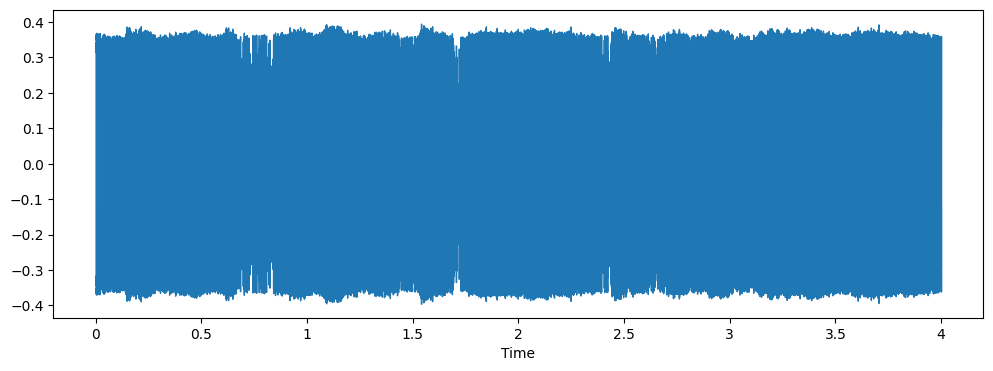

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

Class: street_music


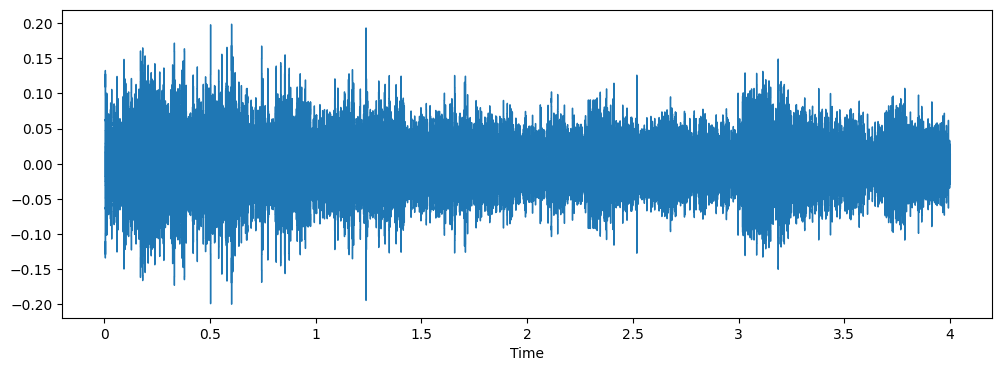

In [ ]:
index = random.choice(df.index)

print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('/content/drive/MyDrive/CollegeProject/train/Train/'+str(df['ID'][index]) + '.wav')

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

Input Split

In [ ]:
import os

def parser(row):
  # path of the file
  file_name = os.path.join('/content/drive/MyDrive/CollegeProject/train/Train', str(row.ID) + '.wav')
  # load the audio file
  x, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
  # extract features from the data
  mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)

  feature = mfccs
  label = row.Class

  return [feature, label]

In [ ]:
data = df.apply(parser, axis=1)
data.columns = ['feature','label']

In [ ]:
# Save the DataFrame to disk
data.to_pickle('/content/drive/MyDrive/CollegeProject/data.pkl')

In [ ]:
import pandas as pd

# Load the DataFrame from the pickle file
data = pd.read_pickle('/content/drive/MyDrive/CollegeProject/data.pkl')

print(data)


0       [[-81.38705, 138.07051, -41.044647, 23.520899,...
1       [[-15.182259, 122.926346, -28.249317, 38.38614...
2       [[-123.35451, 14.803846, -49.6909, 6.908824, -...
3       [[-213.25885, 88.5533, -54.711796, 12.049846, ...
4       [[-237.34935, 135.40514, 39.68763, 20.682573, ...
                              ...                        
5430    [[-213.91998, 177.6027, 0.033657167, 62.77106,...
5431    [[-395.14258, 104.88202, 0.40829432, -7.659940...
5432    [[-321.14655, 58.365414, -7.004362, 15.885545,...
5433    [[-276.0165, 139.62697, -34.78921, 38.11553, 0...
5434    [[-291.0926, 233.22011, -4.70139, 4.835949, 16...
Length: 5435, dtype: object


In [ ]:
data[0]

[array([-81.38705   , 138.07051   , -41.044647  ,  23.520899  ,
        -10.464698  ,  22.462936  , -11.359157  ,  25.23741   ,
         -8.943581  ,  20.997906  ,  -7.3121886 ,  14.429971  ,
         -9.04332   ,   8.254786  , -10.814494  ,   4.039542  ,
        -12.242326  ,   3.7442849 ,  -8.035461  ,   4.9362283 ,
         -3.334925  ,   2.979032  ,  -3.733625  ,   4.9875536 ,
         -2.4154117 ,   5.03505   ,  -1.6765493 ,  -0.7082461 ,
         -3.5401993 ,   0.6913561 ,  -2.050616  ,   0.6349142 ,
         -1.9205171 ,  -0.6942221 ,  -1.2717568 ,  -0.33609885,
          0.72965837,  -0.5877597 ,  -2.4302487 ,  -1.1899618 ],
       dtype=float32),
 'siren']

In [ ]:
# Split the data into training and testing sets
X = np.array(list(zip(*data))[0])
y = np.array(list(zip(*data))[1])

In [ ]:
import numpy as np

# Extract features (X) and labels (y)
X = np.array(data.apply(lambda x: x[0]))
y = np.array(data.apply(lambda x: x[1]))

# Check the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Shape of X: (5435,)
Shape of y: (5435,)


**Label encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y = to_categorical(y_encoded)


In [ ]:
y.shape

(5435, 10)

In [ ]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

**Model Training**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

num_classes = 10

# model creation
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
# train the model
model.fit(X, y, batch_size=32, epochs=100, validation_split=0.25)

Epoch 1/100
128/128 [==============================] - 2s 10ms/step - loss: 4.7929 - accuracy: 0.2157 - val_loss: 2.0496 - val_accuracy: 0.2921
Epoch 2/100
128/128 [==============================] - 1s 8ms/step - loss: 2.0405 - accuracy: 0.2870 - val_loss: 1.8029 - val_accuracy: 0.3525
Epoch 3/100
128/128 [==============================] - 1s 8ms/step - loss: 1.8370 - accuracy: 0.3469 - val_loss: 1.5767 - val_accuracy: 0.4650
Epoch 4/100
128/128 [==============================] - 1s 9ms/step - loss: 1.6505 - accuracy: 0.4043 - val_loss: 1.4072 - val_accuracy: 0.5644
Epoch 5/100
128/128 [==============================] - 1s 8ms/step - loss: 1.5055 - accuracy: 0.4718 - val_loss: 1.2868 - val_accuracy: 0.5960
Epoch 6/100
128/128 [==============================] - 2s 13ms/step - loss: 1.3782 - accuracy: 0.5182 - val_loss: 1.1954 - val_accuracy: 0.6026
Epoch 7/100
128/128 [==============================] - 2s 14ms/step - loss: 1.2734 - accuracy: 0.5557 - val_loss: 1.0904 - val_accuracy: 0.6

In [ ]:
# # prompt:

# # Save the trained model to Google Drive
# model.save('/content/drive/MyDrive/CollegeProject/model.h5')


In [49]:
from google.colab import files
import librosa
import numpy as np
from keras.models import load_model

def extract_features(file_name):
    try:
        # Load the audio file
        x, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        # Extract features
        mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None, None
    return mfccs

# Load the trained model
model = load_model('/content/drive/MyDrive/CollegeProject/model.h5')

# Extract class names from label encoder
class_names = le.classes_

def predict_class(file_path, model, class_names):
    # Extract features
    features = extract_features(file_path)
    if features is not None:
        # Reshape features for model input
        features = features.reshape(1, -1)
        # Predict class probabilities
        predicted_probabilities = model.predict(features)
        # Get the index of the class with the highest probability
        predicted_class_index = np.argmax(predicted_probabilities)
        # Get the corresponding class name
        predicted_class_name = class_names[predicted_class_index]
        return predicted_class_name
    else:
        return None

# Upload audio file
uploaded = files.upload()

# Check if file is uploaded
for file_name in uploaded.keys():
    print('Uploaded file:', file_name)
    # Predict class label
    predicted_class = predict_class(file_name, model, class_names)

    if predicted_class is not None:
        print("Predicted class:", predicted_class)
    else:
        print("Failed to predict class for the given audio file.")


Saving 4209.wav to 4209.wav
Uploaded file: 4209.wav
1/1 [==============================] - 0s 90ms/step
Predicted class: engine_idling


In [50]:
# Check the audio file with prediction file
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

filename= "/content/drive/MyDrive/CollegeProject/test/Test/4209.wav"

# plt.figure(figsize=(14,5))
# data,sample_rate = librosa.load(filename)
# librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)